In [2]:
import pandas as pd
import numpy as np

# Datos

In [3]:
df = pd.read_csv('base_final_lugares.csv')

# Modelo para restaurantes

In [9]:
restaurantes = df.copy()
restaurantes = restaurantes[restaurantes['tipo_lugar']=='Comida mexicana']

In [13]:
#Columnas relevantes para modelo
restaurantes = restaurantes[['place_id', 'user_ratings_total', 'rating', 'price_level', 
                             'comida_norm', 'servicio_norm', 'ambiente_norm', 'satisfaccion_norm']]

In [20]:
restaurantes.describe()

,user_ratings_total,rating,price_level,comida_norm,servicio_norm,ambiente_norm,satisfaccion_norm
count,114.000000,114.000000,73.000000,113.000000,113.000000,113.000000,113.000000
mean,2181.482456,4.544737,2.000000,0.871527,0.382341,0.129544,0.415300
std,6227.755492,0.134422,0.763763,0.228299,0.148049,0.113098,0.167347
min,9.000000,4.100000,1.000000,0.162500,0.012500,0.000000,0.062500
25%,171.500000,4.500000,1.000000,0.766234,0.277778,0.025316,0.293478
50%,509.000000,4.600000,2.000000,0.895522,0.381443,0.111111,0.388889
75%,1649.750000,4.600000,2.000000,1.000000,0.492063,0.214286,0.521277
max,56676.000000,4.900000,4.000000,1.553191,0.767442,0.443038,1.147059


In [15]:
restaurantes.corr()

,user_ratings_total,rating,price_level,comida_norm,servicio_norm,ambiente_norm,satisfaccion_norm
user_ratings_total,1.000000,-0.334310,0.363109,-0.497263,-0.225842,-0.118674,-0.252751
rating,-0.334310,1.000000,0.111716,0.163580,0.174837,0.147982,0.540868
price_level,0.363109,0.111716,1.000000,-0.555073,0.324138,0.349116,0.402884
comida_norm,-0.497263,0.163580,-0.555073,1.000000,0.247014,0.110083,0.163226
servicio_norm,-0.225842,0.174837,0.324138,0.247014,1.000000,0.420429,0.517119
ambiente_norm,-0.118674,0.147982,0.349116,0.110083,0.420429,1.000000,0.366137
satisfaccion_norm,-0.252751,0.540868,0.402884,0.163226,0.517119,0.366137,1.000000


In [16]:
restaurantes.isna().sum()

place_id               0
user_ratings_total     0
rating                 0
price_level           41
comida_norm            1
servicio_norm          1
ambiente_norm          1
satisfaccion_norm      1
dtype: int64

In [24]:
columns_list = restaurantes.columns 

In [28]:
restaurantes_label = restaurantes[columns_list[0]]
restaurantes_variables = restaurantes[columns_list[1:]]

# Limpieza

In [ ]:
# Imputar nulos
from sklearn.impute import KNNImputer

In [31]:
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the dataset
imputer.fit(restaurantes_variables)
# transform the dataset
restaurantes_imputed = imputer.transform(restaurantes_variables)

In [33]:
restaurantes_imputed_df = pd.DataFrame(restaurantes_imputed, columns=[columns_list[1:]])

In [36]:
# Escalar valores
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
restaurantes_imputed_scaled = scaler.fit_transform(restaurantes_imputed)

In [37]:
restaurantes_imputed_df = pd.DataFrame(restaurantes_imputed_scaled, columns=[columns_list[1:]])

# Clusterización

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

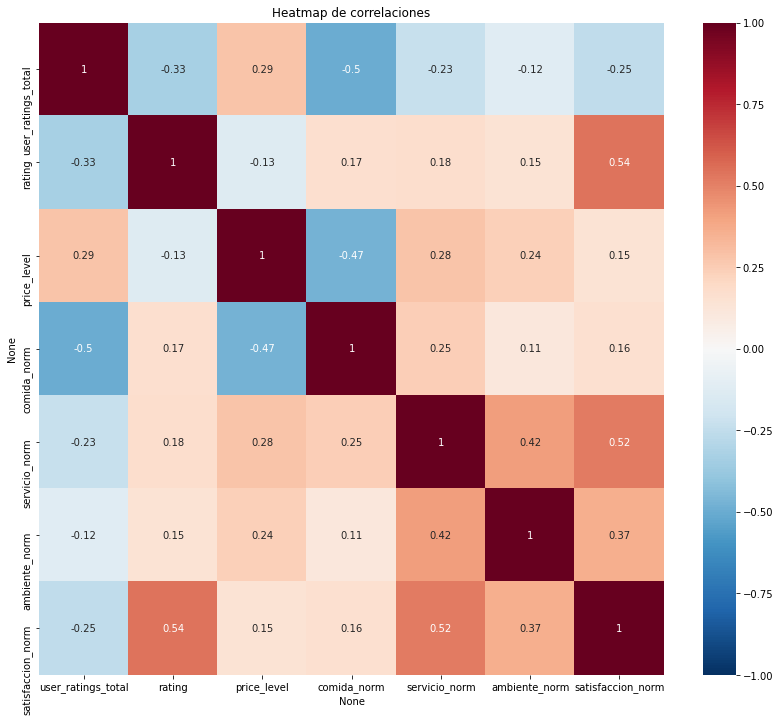

In [45]:
correlation = restaurantes_imputed_df.corr()
#display(correlation)
plt.figure(figsize=(14, 12))

heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.title('Heatmap de correlaciones')
plt.show()

In [47]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [49]:
# Variables para clusterizar
x = ['price_level', 'comida_norm', 'servicio_norm', 'ambiente_norm']

In [50]:
clusters = restaurantes_imputed_df.copy()
clusters = clusters[x]

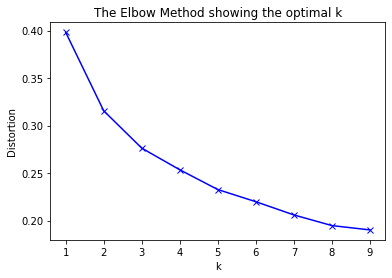

In [51]:
mat = clusters.values

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(mat)
    kmeanModel.fit(mat)
    distortions.append(sum(np.min(cdist(mat, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / mat.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [71]:
## Unsupervised method
kmeans = KMeans(n_clusters=5, random_state=0).fit(mat)
# Get cluster assignment labels
labels = kmeans.labels_
# Format results as a DataFrame
restaurantes_imputed_df['cluster'] = labels.T.tolist()

In [78]:
#Guardar resultados
restaurantes_imputed_df.to_csv('knn_restaurantes_results.csv', index=False)

In [79]:
restaurants_results = pd.read_csv('knn_restaurantes_results.csv')

In [83]:
restaurants_results.groupby('cluster').describe().T

cluster                           0          1          2          3  \
user_ratings_total count  17.000000  28.000000  27.000000  32.000000   
                   mean    0.051621   0.022184   0.007856   0.007922   
                   std     0.050662   0.027464   0.009980   0.009771   
                   min     0.011153   0.000724   0.000459   0.000000   
                   25%     0.017700   0.003353   0.001712   0.001196   
                   50%     0.028517   0.010818   0.004324   0.005047   
                   75%     0.070676   0.028072   0.008823   0.010526   
                   max     0.195158   0.105229   0.037447   0.041753   
rating             count  17.000000  28.000000  27.000000  32.000000   
                   mean    0.588235   0.558036   0.597222   0.570313   
                   std     0.085749   0.190887   0.140112   0.152061   
                   min     0.500000   0.250000   0.250000   0.000000   
                   25%     0.500000   0.500000   0.500000   0.500000   
                   50%     0.625000   0.562500   0.625000   0.625000   
                   75%     0.625000   0.625000   0.625000   0.625000   
                   max     0.750000   1.000000   1.000000   0.875000   
price_level        count  17.000000  28.000000  27.000000  32.000000   
                   mean    0.658824   0.252381   0.227160   0.137500   
                   std     0.032338   0.126175   0.120198   0.133266   
                   min     0.533333   0.000000   0.000000   0.000000   
                   25%     0.666667   0.133333   0.133333   0.000000   
                   50%     0.666667   0.333333   0.266667   0.133333   
                   75%     0.666667   0.333333   0.333333   0.283333   
                   max     0.666667   0.333333   0.333333   0.333333   
comida_norm        count  17.000000  28.000000  27.000000  32.000000   
                   mean    0.399470   0.599773   0.586979   0.522938   
                   std     0.104478   0.112366   0.140254   0.110031   
                   min     0.222711   0.367276   0.302607   0.268992   
                   25%     0.323051   0.532075   0.498353   0.481693   
                   50%     0.424472   0.591371   0.602218   0.526380   
                   75%     0.489424   0.662499   0.654884   0.577638   
                   max     0.543690   0.856007   1.000000   0.746032   
servicio_norm      count  17.000000  28.000000  27.000000  32.000000   
                   mean    0.673142   0.614743   0.536868   0.311440   
                   std     0.123862   0.145188   0.134302   0.099510   
                   min     0.480169   0.389855   0.093826   0.046519   
                   25%     0.603978   0.528652   0.471914   0.242374   
                   50%     0.683808   0.570630   0.532378   0.316085   
                   75%     0.722757   0.656783   0.640489   0.394698   
                   max     0.992087   1.000000   0.716203   0.476647   
ambiente_norm      count  17.000000  28.000000  27.000000  32.000000   
                   mean    0.470414   0.189119   0.605294   0.061027   
                   std     0.159870   0.116622   0.180694   0.073277   
                   min     0.207077   0.000000   0.376190   0.000000   
                   25%     0.336170   0.089725   0.474911   0.000000   
                   50%     0.477983   0.202177   0.549035   0.038484   
                   75%     0.589704   0.278183   0.677339   0.099252   
                   max     0.769481   0.365442   1.000000   0.270857   
satisfaccion_norm  count  17.000000  28.000000  27.000000  32.000000   
                   mean    0.444636   0.351591   0.381545   0.238623   
                   std     0.077250   0.194302   0.114092   0.089999   
                   min     0.275066   0.116535   0.222992   0.028143   
                   25%     0.392912   0.233348   0.280036   0.181355   
                   50%     0.461017   0.306474   0.379126   0.235220   
                   75%     0.487211   0.